# Predicción de tweets


In [119]:
# Descargas

#pip install keras
#!pip install tensorflow

# Librerias
import pandas as pd
import numpy as np
import os
import regex as re
import nltk.corpus
import matplotlib.pyplot as plt
import tensorflow as tf
from nltk.corpus import stopwords




In [103]:
# Directorio
os.chdir("C:/Users/Mateo/OneDrive/Documentos/GitHub/Tweets-de-politicos-colombianos")


In [104]:
# Cargar las bases
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [105]:
# Verificar información

train.info()
# 5538 filas para entrenar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5538 non-null   object
 1   name    5538 non-null   object
 2   text    5538 non-null   object
dtypes: object(3)
memory usage: 129.9+ KB


In [106]:
train.info

<bound method DataFrame.info of                             id   name  \
0     0733198fd8d71099785dc62a  Petro   
1     07bb616ad3f9a56668009f3d  Petro   
2     ee8eab5c534231af23065cae  Petro   
3     99443d1127f1c45d033f1046  Petro   
4     9c13d8bf9a5bf2ac1c05242d  Petro   
...                        ...    ...   
5533  6a306714d6f960556a3c8561  Lopez   
5534  a87fd8e77ba603749319e249  Lopez   
5535  b68248adacf6df197075b2ab  Lopez   
5536  61a54a66d4677fb1ae105362  Lopez   
5537  f5868088cf13da3cb4cc2bde  Lopez   

                                                   text  
0     Me reúno con el empresariado de Nariño para ha...  
1     Es aquí con la belleza que comienza el torrent...  
2     Enorme. El pacto histórico es el pacto de conv...  
3     Popayán, Cauca. Ahora mismo. El cambio de la h...  
4     Plazoleta San Francisco, Popayán con el Pacto ...  
...                                                 ...  
5533  #EnSemanaSantaNosCuidamos 🙌🏼\n\nNo es el momen...  
5534  ¡En e

In [107]:
train.drop('id', inplace=True, axis=1)
test.drop('id', inplace=True, axis=1)

In [108]:
train.text[1]

'Es aquí con la belleza que comienza el torrente de la historia y la cultura.\n\nGracias pueblo Mizak\n\nSebastian de Guambia, Silvia, Cauca. https://t.co/r3GFbQjpdj'

In [109]:
# Stop words

# Descargar
nltk.download('stopwords')

# Establecerlas en español
sstopwords=set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
# Limpiar texto
def texto_limpio(texto):
    texto=texto.lower()

    #Quitar url de pic. y http//

    texto=re.sub(r"http[.\a-z]+", " ", texto)
    texto=re.sub(r"pic.[.\a-z]+", " ", texto) 
    dict_accents={
        "á":"a",
        "é":"e",
        "í":"i",
        "ó":"o",
        "ú":"u",
        "ñ":"n",

    }
    for acc in dict_accents:
     texto= texto.replace(acc, dict_accents.get(acc))


   
    #2. Quitar menciones
    texto=re.sub(r"@[a-zA-Z0-9_]+", " ",texto)
    #3. Quitar hashtags
    texto=re.sub(r"#[a-zA-Z0-9_]+", " ",texto)
    #4. Quitar caracteres especiales
    texto= re.sub(r"[^a-z0-9]", " ", texto)
    #5. Quitar otros numeros
    texto=re.sub(r"[0-9]+", " ", texto)
    #6. Quitar dobles espacios
    texto=re.sub(r"  +", " ", texto)
    #7. Quitar espacios al inicio y final
    texto=texto.strip()
    #8. Quitar stopwords
    texto = ' '.join(word for word in texto.split() if word not in sstopwords) # remove stopwors from text

    return(texto)

In [111]:
train2 = train.copy() 
test2 = test.copy()
train2.text = [texto_limpio(t)for t in train.text]
test2.text = [texto_limpio(t)for t in test.text]

Verificación


In [112]:
print(train.text[1])
print(train2.text[1])

Es aquí con la belleza que comienza el torrente de la historia y la cultura.

Gracias pueblo Mizak

Sebastian de Guambia, Silvia, Cauca. https://t.co/r3GFbQjpdj
aqui belleza comienza torrente historia cultura gracias pueblo mizak sebastian guambia silvia cauca


In [113]:
print(train.text[5533])
print(train2.text[5533])

#EnSemanaSantaNosCuidamos 🙌🏼

No es el momento de bajar la guardia. Los invitamos a conocer en detalle cada una de las medidas y recomendaciones de cuidado para esta Semana Santa 👇🏻

https://t.co/2zjp4UFENT
momento bajar guardia invitamos conocer detalle cada medidas recomendaciones cuidado semana santa


In [114]:
print(test.text[2])
print(test2.text[2])

Hoy radicamos nuestra propuesta de Plan de Ordenamiento Territorial (POT) 2022-2035. 

El POT más verde, sostenible, equitativo, integrador, con enfoque diferencial y de género que construirá la Bogotá del siglo XXI. #ConElPotBogotáReverdece💚
Conéctense👇
https://t.co/GCVbGXVRfn
hoy radicamos propuesta plan ordenamiento territorial pot pot mas verde sostenible equitativo integrador enfoque diferencial genero construira bogota siglo xxi conectense


Poner las clases

In [115]:
train2.head()

,name,text
0,Petro,reuno empresariado narino hablar economia prod...
1,Petro,aqui belleza comienza torrente historia cultur...
2,Petro,enorme pacto historico pacto convivencia permi...
3,Petro,popayan cauca ahora mismo cambio historia colo...
4,Petro,plazoleta san francisco popayan pacto historico


In [116]:

print(train['text'].apply(lambda x: len(x.split(' '))).sum())
# Hay 169k palabras en todo el set

169717


Uribe    2271
Lopez    1715
Petro    1552
Name: name, dtype: int64


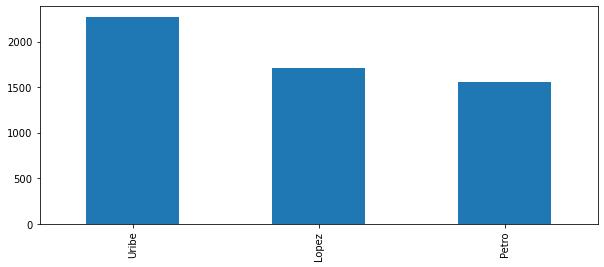

In [117]:
# Balance de clases
print(train2.name.value_counts())

plt.figure(figsize=(10,4))
train2.name.value_counts().plot(kind='bar');

# Más o menos bien balanceado

In [124]:
# Maximo numero de palabras totales.
MAX_NB_WORDS = 50000
# Maximo numero de palabras por entrada a 250: esto es mucho dado que twitter admite alrededor de 240 caracteres.
MAX_SEQUENCE_LENGTH = 250
# Parametro dado.
EMBEDDING_DIM = 100
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train2['text'].values)
word_index = tokenizer.word_index
print('Total de %s palabras unicas.' % len(word_index))

Found 15367 unique tokens.


In [125]:
X = tf.keras.preprocessing.text.Tokenizer.text_to_sequences(train2['text'].values)

AttributeError: type object 'Tokenizer' has no attribute 'text_to_sequences'